<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Membrana_vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vibración de una Membrana Rectangular

Vamos a resolver la **ecuación de onda bidimensional** en la cual se describe el comportamiento de una **membrana rectangular sujeta en todos sus bordes**, mediante el método de **separación de variables**.

La ecuación de onda es:

$
\frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$

donde:
- $ u(x, y, t) $ representa el desplazamiento de la membrana.
- $ c $ es la velocidad de propagación de la onda.

### Condiciones del problema:

- Membrana sujeta:  
  $
  u(0, y, t) = u(a, y, t) = u(x, 0, t) = u(x, b, t) = 0
  $
- Condición inicial de posición:
  $
  u(x, y, 0) = f(x, y) = 0.1(4x - x^2)(2y - y^2)
  $
- Condición inicial de velocidad:
  $
  \frac{\partial u}{\partial t}(x, y, 0) = 0
  $

Este es un problema clásico de **membrana rectangular vibrante**, y su solución se puede expresar como una **serie doble de Fourier**.

In [12]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



definimos variables simbolicas

In [13]:
x, y, m, n = sp.symbols('x y m n', real=True)
a, b = 4, 2  # dimensiones de la membrana
c = 1        # velocidad de propagación

definimos la función inicial

In [14]:
fxy = 0.1 * (4*x - x**2) * (2*y - y**2)
fxy.simplify()

x*y*(0.1*x - 0.4)*(y - 2)

## Cálculo de los coeficientes $B_{mn}$

Dado que la solución general de la ecuación de onda para una membrana rectangular sujeta es de la forma:

$
u(x, y, t) = \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} B_{mn} \cos(\lambda_{mn} t) \sin\left( \frac{m\pi x}{a} \right) \sin\left( \frac{n\pi y}{b} \right)
$

donde:

$
\lambda_{mn} = c \pi \sqrt{\left( \frac{m}{a} \right)^2 + \left( \frac{n}{b} \right)^2}
$

Los coeficientes $ B_{mn}$ se calculan mediante:

$
B_{mn} = \frac{4}{ab} \int_0^a \int_0^b f(x, y) \sin\left( \frac{m\pi x}{a} \right) \sin\left( \frac{n\pi y}{b} \right) \,dy\,dx
$



Usaremos`sympy` para calcular simbolicamente el valor de $ B_{mn}$
 a partir de la función inical

Definimos las funciones

In [11]:
phi_m = sp.sin(m * sp.pi * x / a)
psi_n = sp.sin(n * sp.pi * y / b)

Utilizamos la formula para $B_{mn}$

In [8]:
Bmn_expr = (4 / (a * b)) * sp.integrate(
    sp.integrate(fxy * phi_m * psi_n, (x, 0, a)),
    (y, 0, b)
)

Bmn_expr

0.5*Piecewise(((-6.4*sin(pi*m)/(pi**2*m**2) - 12.8*cos(pi*m)/(pi**3*m**3))*(-8*sin(pi*n)/(pi**2*n**2) - 16*cos(pi*n)/(pi**3*n**3)) + 16*(-6.4*sin(pi*m)/(pi**2*m**2) - 12.8*cos(pi*m)/(pi**3*m**3))/(pi**3*n**3) + 12.8*(-8*sin(pi*n)/(pi**2*n**2) - 16*cos(pi*n)/(pi**3*n**3))/(pi**3*m**3) + 204.8/(pi**6*m**3*n**3), Ne(m, 0) & Ne(n, 0)), (0, True))

Evaluaremos para los primeros coeficientes $B_{mn} $ eso me servira para construir algunos terminos de la serie.

In [9]:
Bmn_func = sp.lambdify((m, n), Bmn_expr, modules='sympy')

#evaluando los primeros coeficientes b_mn
m_vals = [1, 2]
n_vals = [1, 2]


#guardamos los resultados
B_dict = {}

for mi in m_vals:
    for ni in n_vals:
        coef = Bmn_func(mi, ni)
        B_dict[(mi, ni)] = coef
        print(f"B_({mi},{ni}) = {coef}")

B_(1,1) = 0.426050139461981
B_(1,2) = 2.08166817117217E-17
B_(2,1) = 1.90819582357449E-17
B_(2,2) = 0


## Visualización del modo de vibración$ u_{1,1}(x, y, t) $

Vamos a graficar el primer modo de vibración de la membrana (modo \((1,1)\)), en un instante fijo \( t = 0 \). Para este modo, usamos la aproximación:

$
u_{1,1}(x, y, t) = B_{11} \cos(\lambda_{11} t) \sin\left( \frac{\pi x}{a} \right) \sin\left( \frac{\pi y}{b} \right)
$

donde $ B_{11} $ fue calculado simbólicamente, y $\lambda_{11} = c \pi \sqrt{(1/a)^2 + (1/b)^2} $

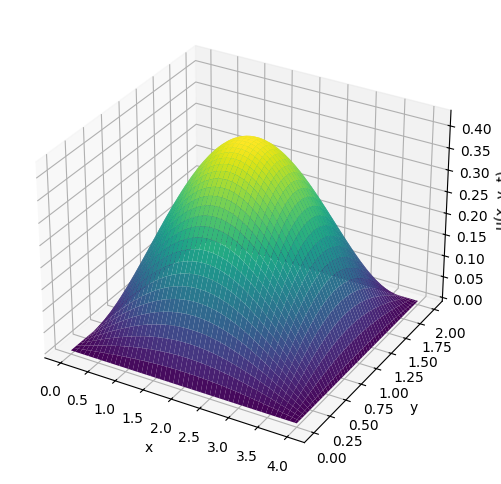

In [16]:
a_val = a
b_val = b
c_val = 1
t_val = 0  # tiempo inicial

#evaluamos B_11
B_11= B_dict[(1, 1)]
lambda_11 = c_val * np.pi * np.sqrt((1/a_val)**2 + (1/b_val)**2)

#construccion de la malla de puntos
X, Y = np.meshgrid(np.linspace(0, a_val, 100), np.linspace(0, b_val, 100))
Z = float(B11) * np.cos(lambda_11 * t_val) * np.sin(np.pi * X / a_val) * np.sin(np.pi * Y / b_val)

# Graficamos
fig= plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
plt.show()